In [1]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [39]:
class MyDataSet:

    def __init__(self):
        pass
    
    def __getitem__(self, key_tup):
        if len(key_tup) == 2:
            row = key_tup[0]
            col = key_tup[1]
            if type(row)==int :
                return list(self.df[col][row].values())
            elif type(row)==slice :
                print('Sorry we are not ready for slices yet...')
            else :
                print('For conditionnal arguments please use the get_cond function.')
        else:
            return list(self.df[key_tup].values())
    
    def read_csv(self, path):
        with open(path, 'r') as file:
            line_count = 0
            for line in file:
                if line_count == 0:
                    colNames = line.strip().split(',')
                    dataframe = dict.fromkeys(colNames, )
                    line_count += 1 
                elif line_count == 1:
                    words = line.strip().split(',')
                    words = [MyDataSet.words_convert(x) for x in words]
                    index = words[0]
                    for i in range(len(words)):
                        dataframe[colNames[i]] = {index: words[i]}
                    line_count += 1
                else:
                    words = line.strip().split(',')
                    words = [MyDataSet.words_convert(x) for x in words]
                    index = words[0]
                    for i in range(len(words)):
                        dataframe[colNames[i]][index] = words[i]
                    line_count += 1
        self.df = dataframe
        return self
    
    @staticmethod
    def words_convert(item):
        if item == '' :
            return np.nan
        else:
            try:
                return int(item)
            except ValueError:
                try:
                    return float(item)
                except ValueError:
                    return item
    
    def get_cond(self, cond_col, cond_val, get_col, dropna = True):
        idx = [key for key, value in self.df[cond_col].items() if value == cond_val]
        if dropna == True:
            return [self.df[get_col][x] for x in idx if str(self.df[get_col][x]) != 'nan']
        else:
            return [self.df[get_col][x] for x in idx]
    
    def describe(self):
        keys_float = [keys for keys in self.df.keys() if type(list(self.df[keys].values())[0]) == float]
        t = PrettyTable(['',*keys_float[:8]])
        t.add_row(['count', *[self.column_count(keys) for keys in keys_float[:8]]])
        t.add_row(['mean', *[self.column_mean(keys) for keys in keys_float[:8]]])
        t.add_row(['std', *[self.standard_deviation(keys) for keys in keys_float[:8]]])
        t.add_row(['min', *[self.column_minimum(keys) for keys in keys_float[:8]]])
        t.add_row(['25%', *[self.quartiles(keys, 0.25) for keys in keys_float[:8]]])
        t.add_row(['50%', *[self.quartiles(keys, 0.5) for keys in keys_float[:8]]])
        t.add_row(['75%', *[self.quartiles(keys, 0.75) for keys in keys_float[:8]]])
        t.add_row(['max', *[self.column_maximum(keys) for keys in keys_float[:8]]])

        t2 = PrettyTable(['',*keys_float[8:]])
        t2.add_row(['count', *[self.column_count(keys) for keys in keys_float[8:]]])
        t2.add_row(['mean', *[self.column_mean(keys) for keys in keys_float[8:]]])
        t2.add_row(['std', *[self.standard_deviation(keys) for keys in keys_float[8:]]])
        t2.add_row(['min', *[self.column_minimum(keys) for keys in keys_float[8:]]])
        t2.add_row(['25%', *[self.quartiles(keys, 0.25) for keys in keys_float[8:]]])
        t2.add_row(['50%', *[self.quartiles(keys, 0.5) for keys in keys_float[8:]]])
        t2.add_row(['75%', *[self.quartiles(keys, 0.75) for keys in keys_float[8:]]])
        t2.add_row(['max', *[self.column_maximum(keys) for keys in keys_float[8:]]])

        print(t)
        print(t2)

    def column_count(self, feature):
        column = self.df[feature]
        count = 0
        for key,value in column.items():
            if str(value) != 'nan':
                count = count + 1
            else:
                continue
        return count

    def column_mean(self, feature):
        column = self.df[feature]
        count = 0
        total = 0
        for key,value in column.items():
            if str(value) != 'nan':
                count = count + 1
                total = total + value
            else:
                continue
        return total/count

    def standard_deviation(self, feature):
        column = self.df[feature]
        count = 0
        total = 0
        for key,value in column.items():
            if str(value) != 'nan':
                count = count + 1
                total = total + value
            else:
                continue
        mean = total/count

        variance = 0
        for key, value in column.items():
            if str(value) != 'nan':
                res = value - mean
                square = res*res
                variance = variance + square
            else:
                continue
        return (variance/(count-1))**(1/2)

    def column_minimum(self, feature):
        column = self.df[feature]
        mini = np.inf
        for key,value in column.items():
            if mini > value:
                mini = value
            else:
                continue
        return mini

    def column_maximum(self, feature):
        column = self.df[feature]
        maxi = - np.inf
        for key,value in column.items():
            if maxi < value:
                maxi = value
            else:
                continue
        return maxi

    def quartiles(self, feature, quart):
        mylist = list(self.df[feature].values())
        func_list = mylist.copy()
        func_list = [x for x in func_list if str(x) != 'nan']
        func_list.sort()
        quart_idx = quart*len(func_list)
        if quart_idx.is_integer() :
            result = (func_list[int(quart_idx)] + func_list[int(quart_idx)-1])/2
            return result
        else:
            result = func_list[int(quart_idx)]
            return result
    
    def plot_hist(self):
        class_list = [keys for keys in dataset_train.df.keys() if type(list(dataset_train.df[keys].values())[0]) == float]
        num_cols = int(len(class_list)/2) + 1 
        fig, axes = plt.subplots(2, num_cols, sharey=True, figsize=(15,6))
        i, j = [0, 0]
        for class_name in class_list :
            for house in set(self.df['Hogwarts House'].values()):
                axes[i,j].hist(self.get_cond('Hogwarts House', house, class_name), alpha=0.7)
                axes[i,j].set_title(class_name, fontsize = 12)
            if j < num_cols - 1 :
                j += 1
            else :
                i += 1
                j = 0

        plt.show()
    
    def plot_scatter(self):
        class_list = [keys for keys in dataset_train.df.keys() if type(list(dataset_train.df[keys].values())[0]) == float]
        num_cols = len(class_list)
        fig, axes = plt.subplots(num_cols, num_cols, figsize=(30,30))
        i = 0
        for class_name_1 in class_list :
            j = 0
            for class_name_2 in class_list :
                if i == j :
                    axes[i,j].text(x=0.1, y=1/2, s=class_name_1, fontsize=15)
                else :
                    axes[i,j].scatter(x=self[class_name_1], y=self[class_name_2])
                axes[i,j].set_xticklabels([])
                axes[i,j].set_yticklabels([])
                j += 1
            i += 1
        plt.show()
    
    def plot_pair(self):
        class_list = [keys for keys in dataset_train.df.keys() if type(list(dataset_train.df[keys].values())[0]) == float]
        num_cols = len(class_list)
        fig, axes = plt.subplots(num_cols, num_cols, figsize=(60,60))
        i = 0
        for class_name_1 in class_list :
            j = 0
            for class_name_2 in class_list :

                if j==0 :
                    axes[i,j].set_ylabel(class_name_1, fontsize=30)

                if i == j :
                    for house in set(self['Hogwarts House']) :
                        axes[i,j].hist(self.get_cond('Hogwarts House', house, class_name_1), alpha=0.7)
                else :
                    for house in set(self['Hogwarts House']) :
                            sc_x = self.get_cond('Hogwarts House', house, class_name_1, dropna=False)
                            sc_y = self.get_cond('Hogwarts House', house, class_name_2, dropna=False)
                            axes[i,j].scatter(x=sc_x, y=sc_y)
                axes[i,j].set_xticklabels([])
                axes[i,j].set_yticklabels([])

                if i==num_cols-1 :
                    axes[i,j].set_xlabel(class_name_2, fontsize=30)

                j += 1
            i += 1
        plt.show()

In [40]:
dataset_train = MyDataSet().read_csv('resources/dataset_train.csv')

## Describe

## Histogram

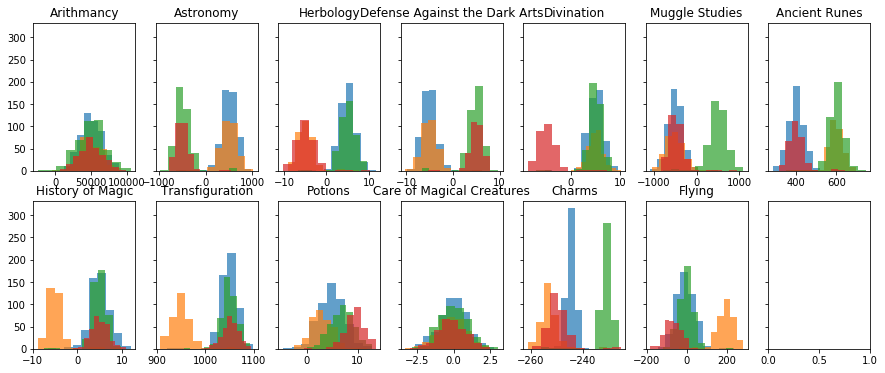

In [26]:
class_list = [keys for keys in dataset_train.df.keys() if type(list(dataset_train.df[keys].values())[0]) == float]
num_cols = int(len(class_list)/2) + 1 
fig, axes = plt.subplots(2, num_cols, sharey=True, figsize=(15,6))
i, j = [0, 0]
for class_name in class_list :
    for house in set(dataset_train['Hogwarts House']):
        axes[i,j].hist(dataset_train.get_cond('Hogwarts House', house, class_name), alpha=0.7)
        axes[i,j].set_title(class_name, fontsize = 12)
    if j < num_cols - 1 :
        j += 1
    else :
        i += 1
        j = 0
    
plt.show()

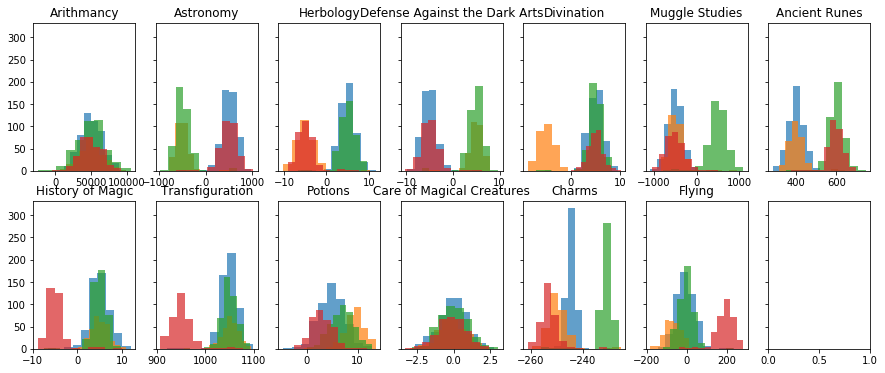

In [32]:
dataset_train.plot_hist()

## Scatter plot

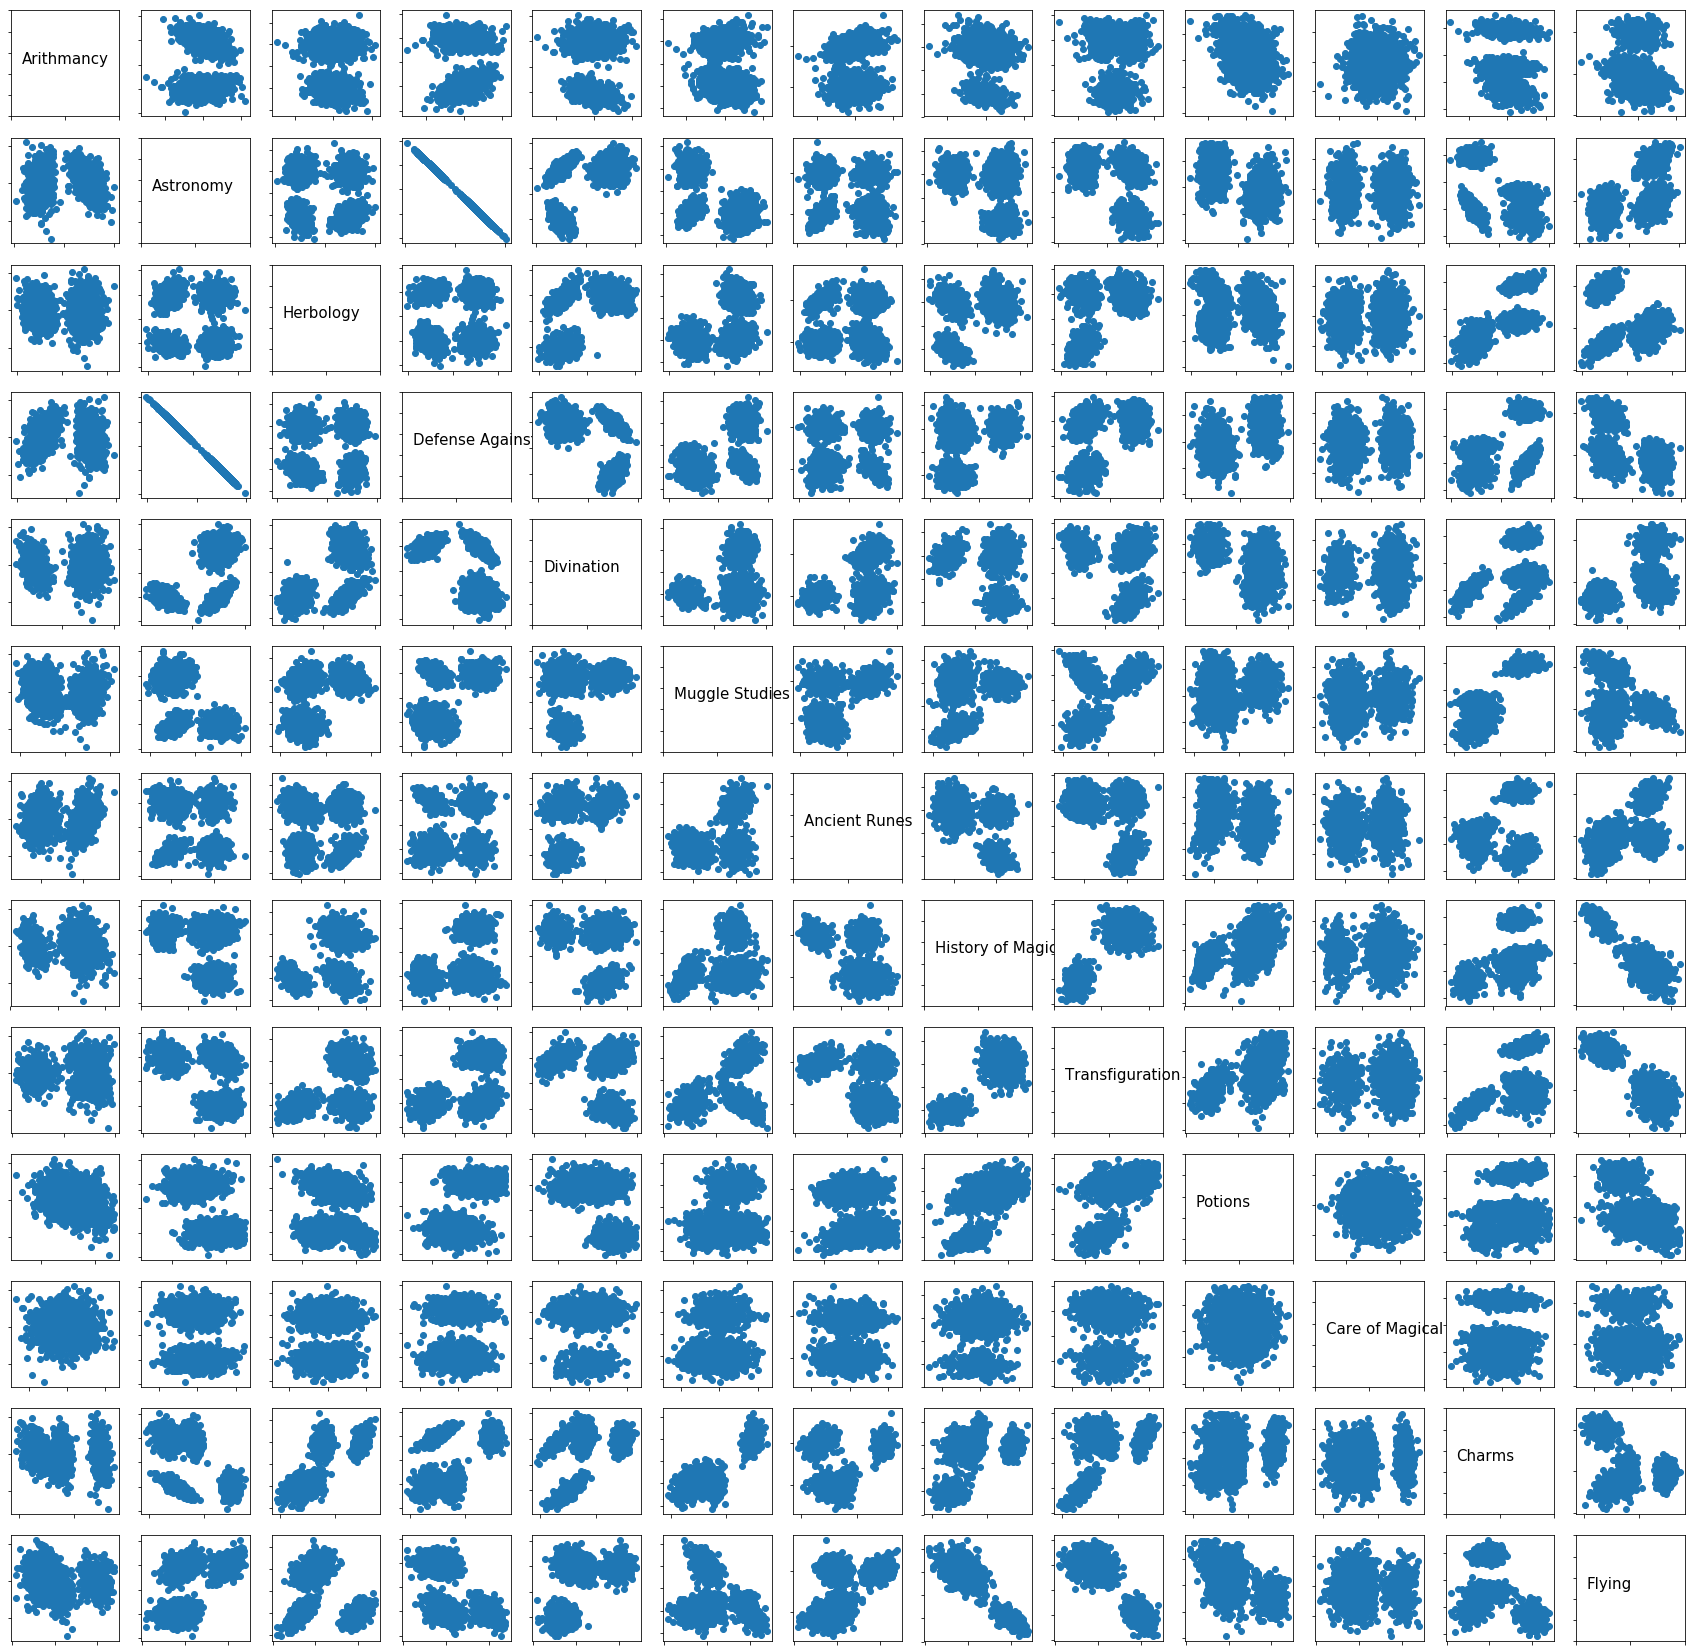

In [96]:
class_list = [keys for keys in dataset_train.df.keys() if type(list(dataset_train.df[keys].values())[0]) == float]
num_cols = len(class_list)
fig, axes = plt.subplots(num_cols, num_cols, figsize=(30,30))
i = 0
for class_name_1 in class_list :
    j = 0
    for class_name_2 in class_list :
        
        if i == j :
            axes[i,j].text(x=0.1, y=1/2, s=class_name_1, fontsize=15)
        else :
            axes[i,j].scatter(x=dataset_train[class_name_1], y=dataset_train[class_name_2])
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])
        j += 1
    i += 1
    
plt.show()

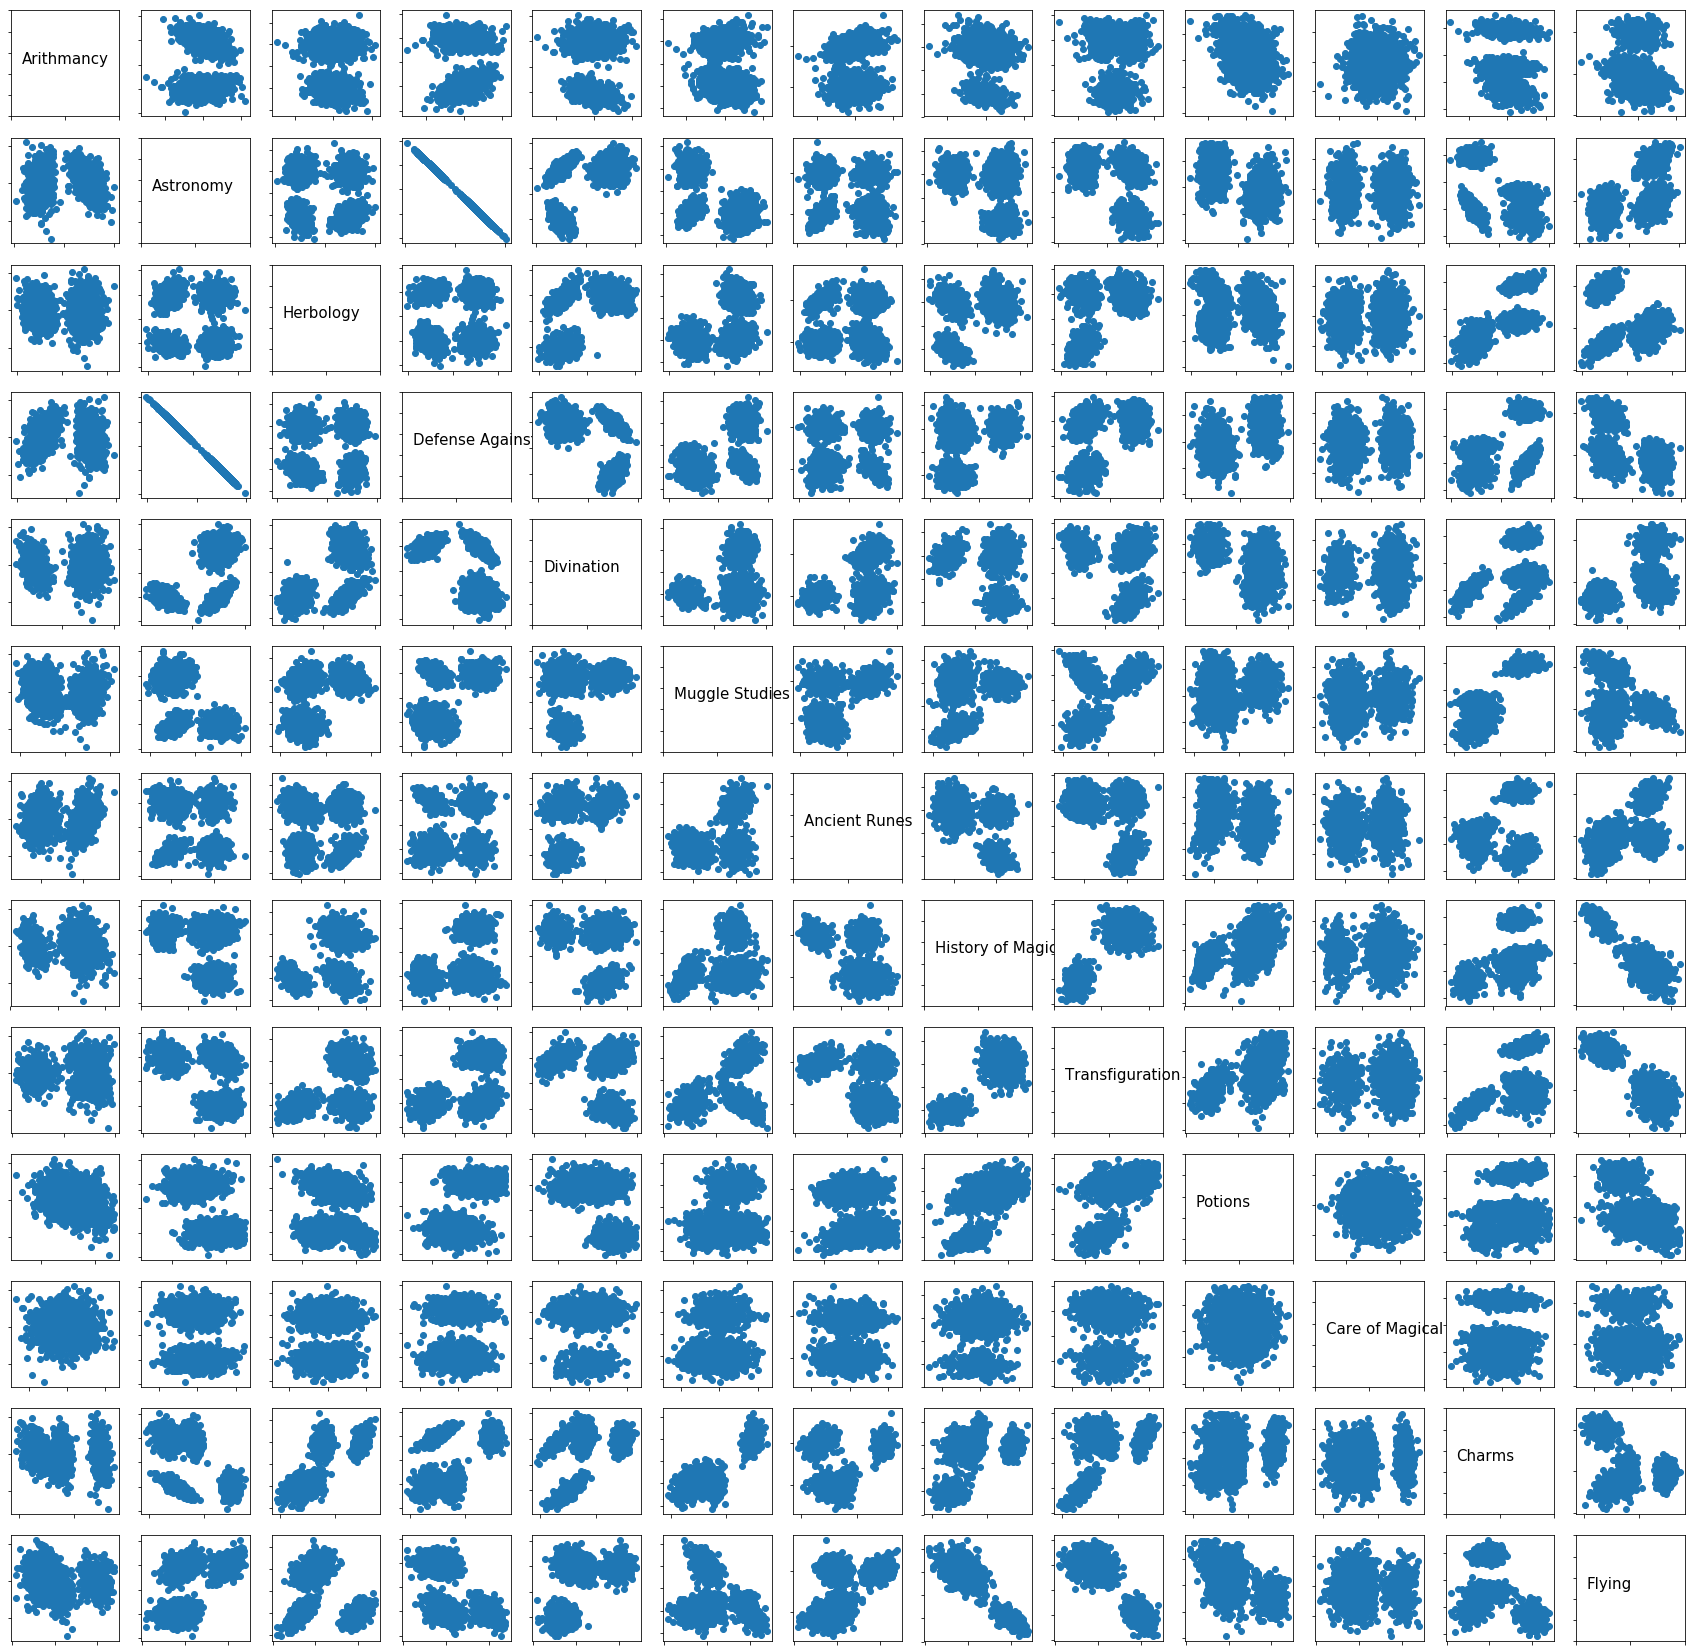

In [31]:
dataset_train.plot_scatter()

## Pair plot

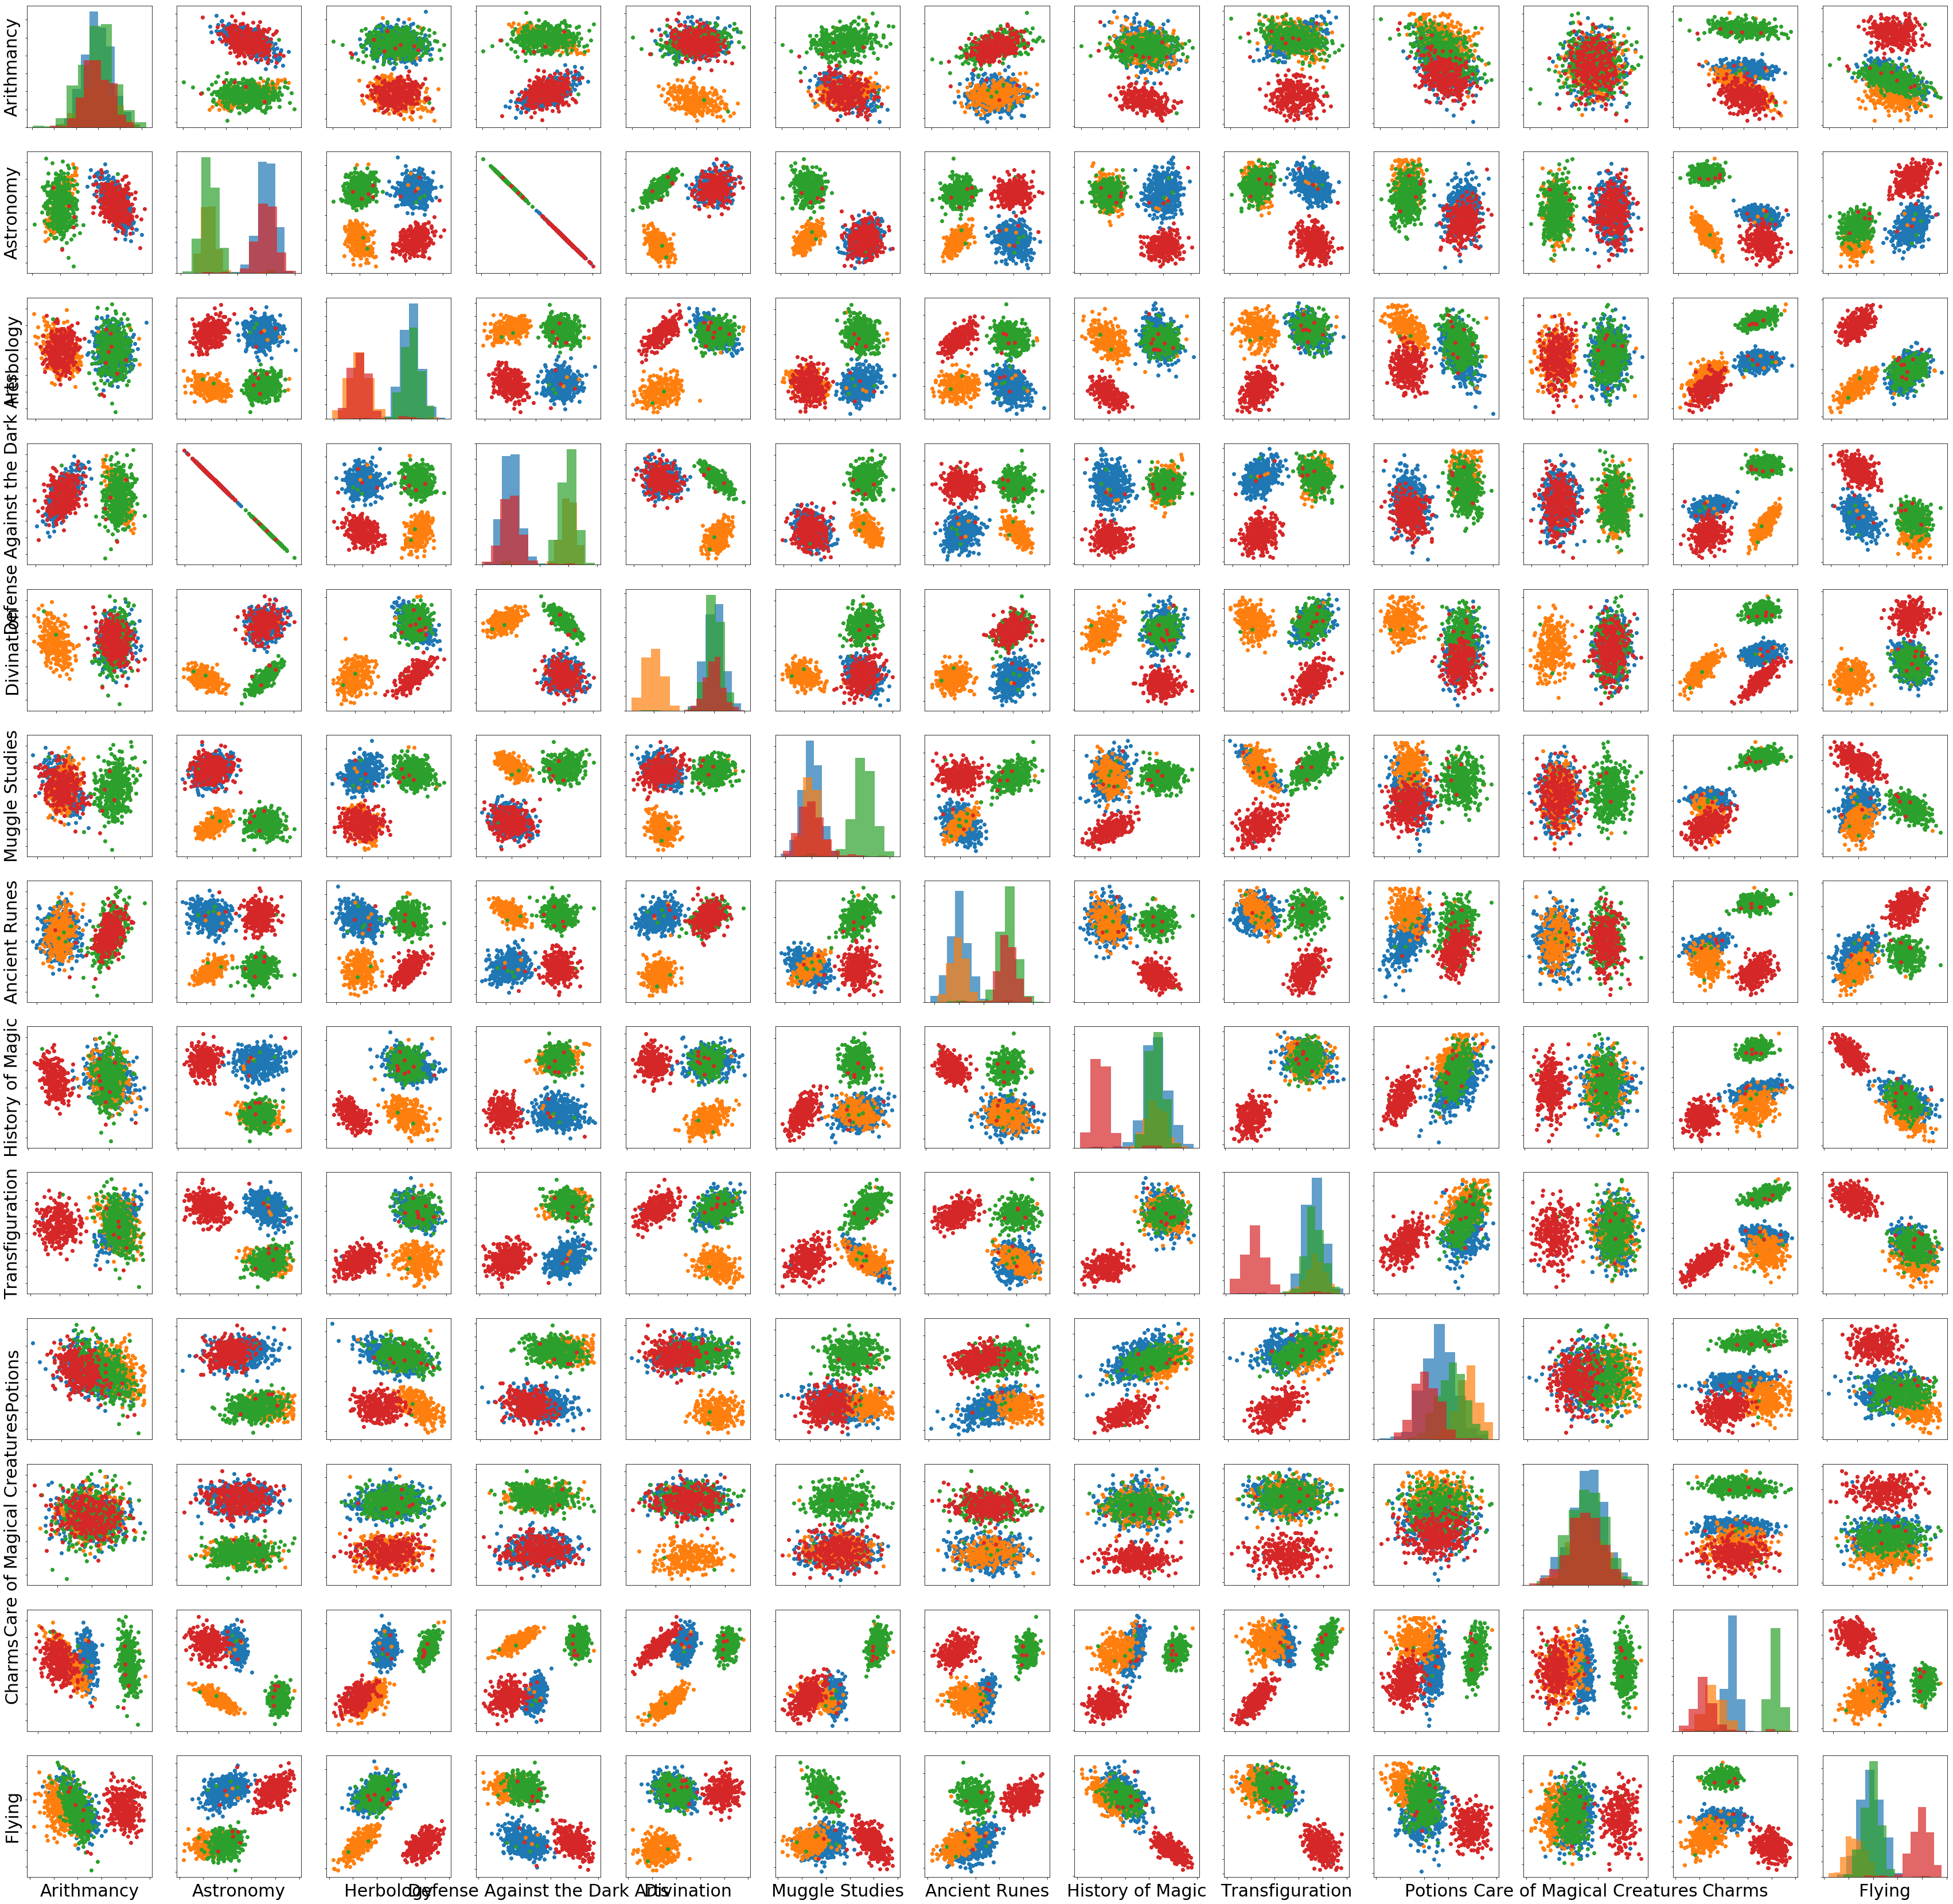

In [24]:
class_list = [keys for keys in dataset_train.df.keys() if type(list(dataset_train.df[keys].values())[0]) == float]
num_cols = len(class_list)
fig, axes = plt.subplots(num_cols, num_cols, figsize=(60,60))
i = 0
for class_name_1 in class_list :
    j = 0
    for class_name_2 in class_list :
        
        if j==0 :
            axes[i,j].set_ylabel(class_name_1, fontsize=30)
            
        if i == j :
            for house in set(dataset_train['Hogwarts House']) :
                axes[i,j].hist(dataset_train.get_cond('Hogwarts House', house, class_name_1), alpha=0.7)
        else :
            for house in set(dataset_train['Hogwarts House']) :
                    sc_x = dataset_train.get_cond('Hogwarts House', house, class_name_1, dropna=False)
                    sc_y = dataset_train.get_cond('Hogwarts House', house, class_name_2, dropna=False)
                    axes[i,j].scatter(x=sc_x, y=sc_y)
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])
        
        if i==num_cols-1 :
            axes[i,j].set_xlabel(class_name_2, fontsize=30)
            
        j += 1
    i += 1
    
plt.show()

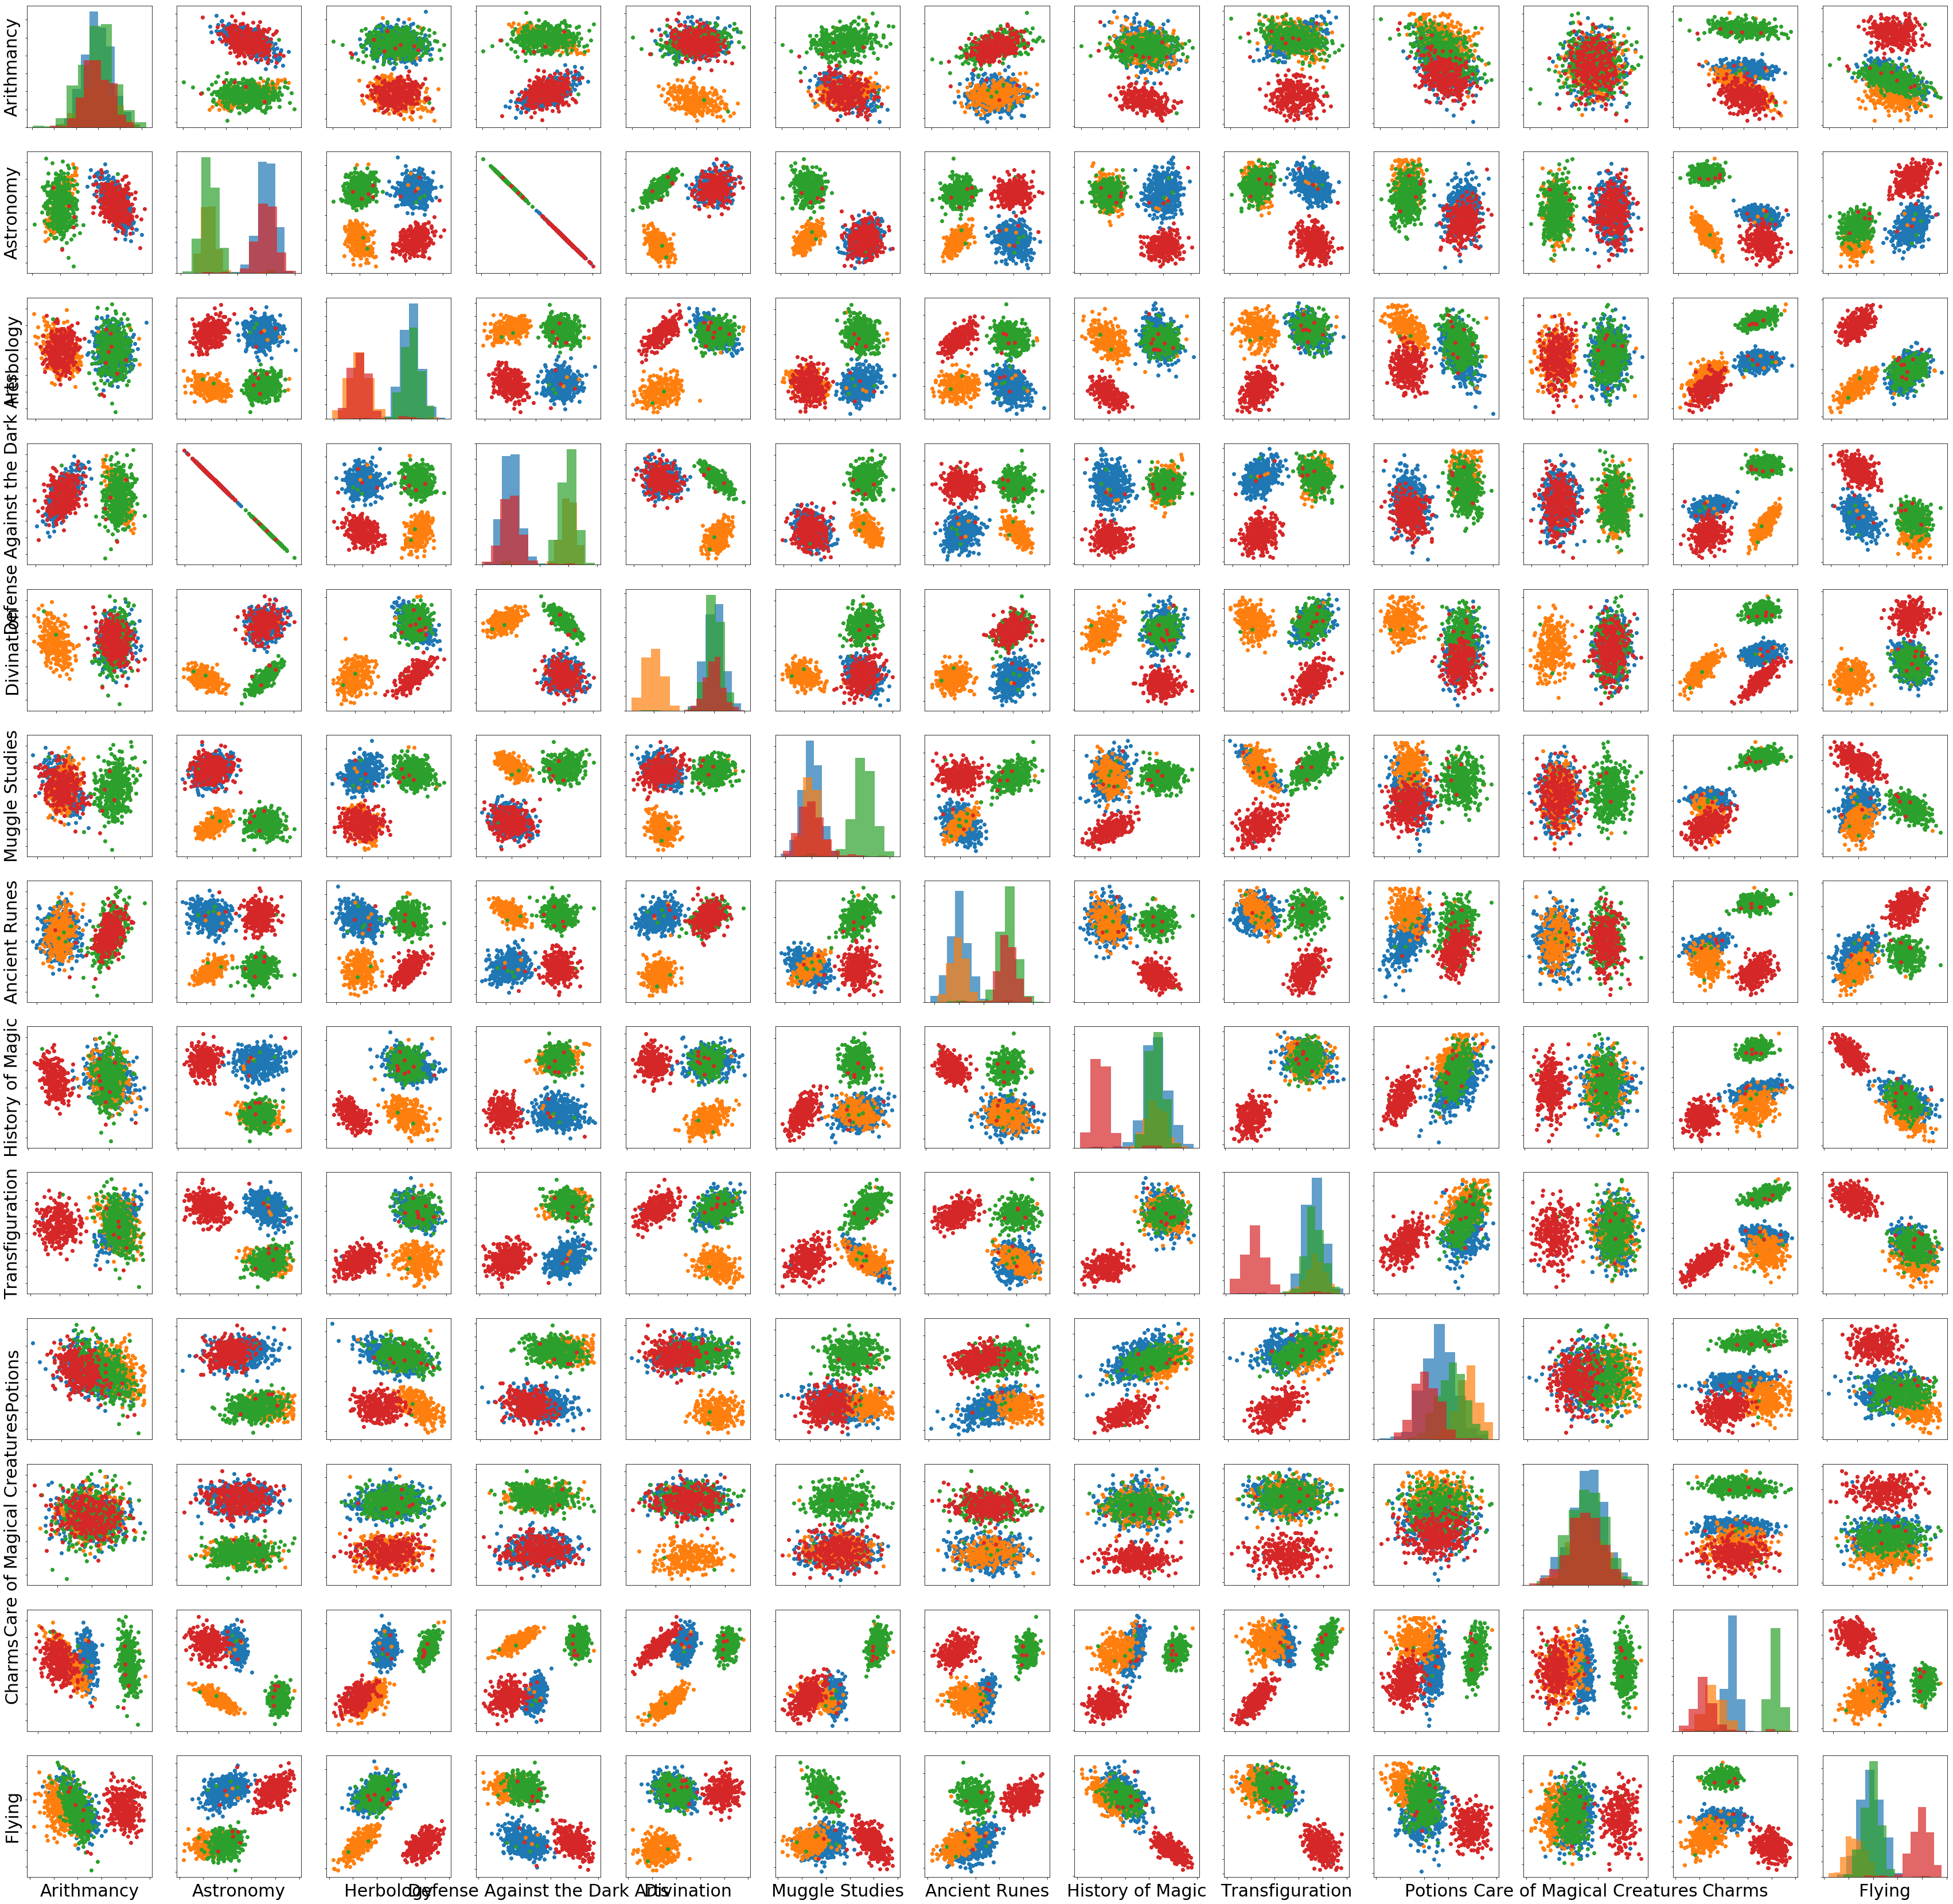

In [41]:
dataset_train.plot_pair()